In [1]:
import os, time
import numpy as np
import pandas as pd
import config.hyperparams as hp
from tqdm.notebook import trange, tqdm
from entities.solver_process import SolverProcess  
from lib.common import disarrange
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from multiprocessing import Queue
from lib import wlanlrz_loader, rtt_matrix_loader, inference_loader, solver

### WLAN-LRZ AP Data Loader ####
desc = wlanlrz_loader.load_data_description(hp.AP_DESCR)
original_data, coord_dataframe_list, total_ap, original_merged_raw_ap_data = \
wlanlrz_loader.load_data_parallel(hp.BUILDING, desc, mass_load=True)

Parallel loading of APs data ...
Activating threads now


 31%|███▏      | 5/16 [00:01<00:02,  4.10it/s]]

File not found!


 33%|███▎      | 4/12 [00:01<00:02,  2.88it/s]

File not found!


  8%|▊         | 1/13 [00:00<00:06,  1.95it/s]

 40%|████      | 4/10 [00:01<00:02,  2.52it/s]

File not found!


 44%|████▍     | 8/18 [00:02<00:04,  2.36it/s]]

File not found!


 50%|█████     | 1/2 [00:00<00:00,  1.77it/s]]

File not found!


 50%|█████     | 9/18 [00:03<00:04,  2.03it/s]

File not found!


100%|██████████| 5/5 [00:02<00:00,  1.66it/s]]

File not found!


  5%|▌         | 1/20 [00:00<00:12,  1.53it/s]

File not found!


  5%|▍         | 1/22 [00:00<00:11,  1.76it/s]]

File not found!


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

File not found!


 15%|█▌        | 2/13 [00:01<00:07,  1.44it/s]

File not found!


100%|██████████| 3/3 [00:01<00:00,  2.24it/s]]

File not found!


 11%|█         | 1/9 [00:00<00:05,  1.42it/s]]

  0%|          | 0/16 [00:00<?, ?it/s]

File not found!


 42%|████▏     | 5/12 [00:03<00:04,  1.49it/s]]

File not found!


 77%|███████▋  | 10/13 [00:05<00:02,  1.49it/s]

File not found!


 12%|█▎        | 1/8 [00:00<00:05,  1.19it/s]]]]

File not found!


 11%|█▏        | 6/53 [00:04<00:34,  1.36it/s]]

File not found!


 20%|██        | 6/30 [00:04<00:17,  1.35it/s]

File not found!


 67%|██████▋   | 4/6 [00:03<00:01,  1.21it/s]]

File not found!


 50%|█████     | 3/6 [00:02<00:02,  1.15it/s]]]

File not found!


 54%|█████▍    | 7/13 [00:05<00:04,  1.28it/s]]]

File not found!


 38%|███▊      | 6/16 [00:04<00:08,  1.19it/s]

File not found!


 31%|███       | 12/39 [00:07<00:21,  1.24it/s]

File not found!


 36%|███▋      | 8/22 [00:05<00:10,  1.29it/s]]]

File not found!


  8%|▊         | 1/12 [00:00<00:08,  1.23it/s]

File not found!



100%|██████████| 1/1 [00:01<00:00,  1.00s/it]s]

File not found!


 94%|█████████▍| 15/16 [00:08<00:00,  1.09it/s]

File not found!


 13%|█▎        | 2/15 [00:01<00:11,  1.14it/s]]

 64%|██████▎   | 14/22 [00:10<00:07,  1.04it/s]

File not found!



 52%|█████▏    | 16/31 [00:10<00:13,  1.07it/s]

File not found!


100%|██████████| 11/11 [00:10<00:00,  1.02s/it]]

File not found!


 31%|███▏      | 5/16 [00:04<00:10,  1.01it/s]]

File not found!


  0%|          | 0/1 [00:00<?, ?it/s] 1.01s/it]

 35%|███▍      | 18/52 [00:15<00:36,  1.06s/it]

File not found!


 40%|████      | 2/5 [00:02<00:03,  1.18s/it]t]

File not found!


 69%|██████▉   | 9/13 [00:09<00:04,  1.08s/it]]

  6%|▋         | 1/16 [00:01<00:16,  1.12s/it]]

100%|██████████| 21/21 [00:18<00:00,  1.15s/it]

 32%|███▏      | 6/19 [00:06<00:14,  1.08s/it]

 30%|███       | 21/69 [00:18<00:52,  1.10s/it]

File not found!



 67%|██████▋   | 4/6 [00:04<00:02,  1.17s/it]t]]

 67%|██████▋   | 24/36 [00:20<00:12,  1.08s/it]

File not found!


 82%|████████▏ | 18/22 [00:17<00:04,  1.11s/it]

File not found!


 40%|███▉      | 21/53 [00:19<00:34,  1.09s/it]

 14%|█▍        | 1/7 [00:00<00:05,  1.00it/s]]

File not found!


 22%|██▏       | 10/46 [00:11<00:41,  1.14s/it]

File not found!


  2%|▏         | 1/63 [00:00<00:58,  1.06it/s]]]

 58%|█████▊    | 11/19 [00:10<00:07,  1.10it/s]

File not found!


 18%|█▊        | 28/152 [00:23<02:01,  1.02it/s]

File not found!


 52%|█████▏    | 29/56 [00:24<00:26,  1.01it/s]

 96%|█████████▋| 26/27 [00:25<00:01,  1.03s/it]]

 86%|████████▋ | 32/37 [00:27<00:05,  1.01s/it]

 33%|███▎      | 16/49 [00:16<00:32,  1.03it/s]

File not found!


 33%|███▎      | 10/30 [00:09<00:16,  1.20it/s]

File not found!


 35%|███▍      | 9/26 [00:08<00:13,  1.27it/s]]]

File not found!


100%|██████████| 37/37 [00:32<00:00,  1.27it/s]

File not found!


100%|██████████| 23/23 [00:22<00:00,  1.04it/s]

 52%|█████▏    | 24/46 [00:22<00:14,  1.55it/s]

File not found!


100%|██████████| 24/24 [00:21<00:00,  1.11it/s]]

 95%|█████████▍| 53/56 [00:38<00:01,  2.66it/s]]

File not found!


 78%|███████▊  | 36/46 [00:27<00:03,  3.07it/s]

File not found!


 38%|███▊      | 57/152 [00:39<00:22,  4.15it/s]

100%|██████████| 49/49 [00:27<00:00,  1.76it/s]]

100%|██████████| 152/152 [00:48<00:00,  3.10it/s]


In [2]:
def start_solver(agents, edge_nodes, rtt_matrix, merged_raw_ap_data, cloud_only=False):
    if cloud_only:
        env, agents_a, edge_nodes_e, convergence_time, _ = \
            solver.algorithm_cloud(agents, edge_nodes, 5, 4, 100, None, None, rtt_matrix, merged_raw_ap_data, suppress_output=True)
    else:
        env, agents_a, edge_nodes_e, convergence_time, _ = \
            solver.algorithm_v3(agents, edge_nodes, 5, 4, 100, None, None, rtt_matrix, merged_raw_ap_data, suppress_output=True)

    result = (env, agents_a, edge_nodes_e, convergence_time)

    if hp.STORE_RESULTS:
        env.episodes_tracker[:,:,episode]
        np.savetxt(hp.CSV_FOLDER + '/' + str(episode) + '.csv', env.episodes_tracker[:,:,episode], delimiter=',')
    
    return result


In [3]:
from lib.common import generate_agents, generate_edge_nodes

T1_RATIO_VEC_ABS = np.array([350, 250, 150, 100])
T2_RATIO_VEC_ABS = np.array([200, 100, 50, 25])
T3_RATIO_VEC_ABS = np.array([10, 5, 2, 0])

TARGET_MA = 4000
dim = 0
iterations = 20

k = [1,5,10,25,50,75,100,0]
# LABELS = [1, 5, 10, 25, 50, 75, 100, TOTAL_EN]
result_kl = []

RESULTS = []

print("Total APs: {}".format(total_ap))
original_data['timestamp'] = original_data.index

# Filter the dataser based on the minimum amount of users we want to serve
data = original_data[(original_data.total >= TARGET_MA) & (original_data.total < (TARGET_MA*1.1))].sample()
merged_raw_ap_data = original_merged_raw_ap_data[original_merged_raw_ap_data.index.isin(data.index)]
merged_raw_ap_data = merged_raw_ap_data.loc[:, (merged_raw_ap_data > 0).all()]

MA = int(data.total)
total_ap = len(merged_raw_ap_data.columns)

for experiments in range(len(T1_RATIO_VEC_ABS)):    

    print(" === Iteration {} for MA {} ===".format(experiments, MA))

    #TIER_1_EN = int(round(total_ap * T1_RATIO_VEC_REL[experiments]))
    #TIER_2_EN = int(T2_RATIO_VEC_REL[experiments] * MA)
    #TIER_3_EN = int(T3_RATIO_VEC_REL[experiments] * MA)

    TIER_1_EN = T1_RATIO_VEC_ABS[experiments]
    TIER_2_EN = T2_RATIO_VEC_ABS[experiments]
    TIER_3_EN = T3_RATIO_VEC_ABS[experiments]

    EN_RATIO = (TIER_1_EN, TIER_2_EN, TIER_3_EN)
    TOTAL_EN = int(TIER_1_EN + TIER_2_EN + TIER_3_EN)

    if hp.STORE_RESULTS:
        try:
            os.mkdir(hp.CSV_FOLDER)
        except OSError:
            print ("Creation of the directory %s failed" % hp.CSV_FOLDER)
        else:
            print ("Successfully created the directory %s " % hp.CSV_FOLDER)

    if hp.dataset_rtt:
        ### LOAD LATENCY MATRIX FROM DATASET ###
        print("Loading rtt matrix from dataset")
        clf = rtt_matrix_loader.analyze_data(source=hp.dataset_rtt, drange=1000, threshold=250, k=3)
        clf.weights_ = [0.2, 0.2, 0.6]
        rtt_matrix = rtt_matrix_loader.generate_data(clf, n=total_ap, m=TOTAL_EN)
    else:
        # Prepare latency matrixes for all the EN classes with increasing latency based on distance from the edge 
        rtt_matrix_en_t1 = np.round(abs(np.random.normal(1, 0.2, (TIER_1_EN, TIER_1_EN))))
        rtt_matrix_en_t2 = np.round(abs(np.random.normal(3, 1, (TIER_1_EN, TIER_2_EN))))
        rtt_matrix_en_t3 = np.round(abs(np.random.normal(10, 1, (TIER_1_EN, TIER_3_EN))))

        sns.distplot(rtt_matrix_en_t1.flatten(), hist=False, rug=True)
        sns.distplot(rtt_matrix_en_t2.flatten(), hist=False, rug=True)
        sns.distplot(rtt_matrix_en_t3.flatten(), hist=False, rug=True)

        rtt_matrix = np.hstack([rtt_matrix_en_t1, rtt_matrix_en_t2, rtt_matrix_en_t3])

    disarrange(rtt_matrix, axis=0)

    # Manually setting latency for colocated AP/EN
    for i in range(round(TIER_1_EN)):
        rtt_matrix[i][i] = 1

    # print("Plotting and saving RTT matrix")
    # fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    # sns.heatmap(rtt_matrix, ax=ax)
    # fig.tight_layout(w_pad=1.5)
    # fig.savefig("../plots/rtt_matrix.pdf")

    print("Starting the solver")

    for ke in k:
        hp.local_search_scope = ke
        print("κ: {}".format(ke))

        for i in range(iterations):
            agents = generate_agents(MA, merged_raw_ap_data, dim)
            edge_nodes = generate_edge_nodes(EN_RATIO, merged_raw_ap_data, dim)
            result_kl.append(start_solver(agents, edge_nodes, rtt_matrix, merged_raw_ap_data))


Total APs: 4371
 === Iteration 0 for MA 4048 ===
Loading rtt matrix from dataset
Starting the solver
κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0
 === Iteration 1 for MA 4048 ===
Loading rtt matrix from dataset
Starting the solver
κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0
 === Iteration 2 for MA 4048 ===
Loading rtt matrix from dataset
Starting the solver
κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0
 === Iteration 3 for MA 4048 ===
Loading rtt matrix from dataset
Starting the solver
κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0


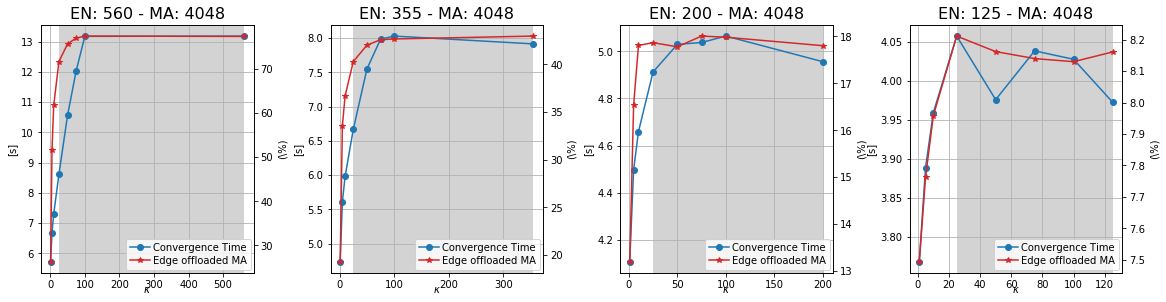

In [4]:
from entities.mobile_agent import Offloaded

fig, ax = plt.subplots(1,4,figsize=(16, 4), constrained_layout=False)
LABELS = [
    [1, 5, 10, 25, 50, 75, 100, 560],
    [1, 5, 10, 25, 50, 75, 100, 355],
    [1, 5, 10, 25, 50, 75, 100, 200],
    [1, 5, 10, 25, 50, 75, 100, 125]
]

list_of_groups = zip(*(iter(result_kl),) * iterations)
list_of_groups_sub = zip(*(iter(list_of_groups),) * len(LABELS[0]))

for idx, subl in enumerate(list_of_groups_sub):
    conv_time = []
    cov = []
    
    for re in subl:
        conv_time.append(np.median(list(map(lambda b: b[3], re))))

        agents = np.concatenate(list(map(lambda z: z[1], re))) 
        cov.append(len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations / MA * 100)

    
    ax[idx].plot(LABELS[idx], conv_time, marker="o", label="Convergence Time")
    ax[idx].set_ylabel("[s]")
    ax[idx].set_xlabel("$\kappa$",labelpad=-5)
    ax[idx].set_title("EN: {} - MA: {}".format(LABELS[idx][-1], MA), fontsize=16)
    ax[idx].grid()

    ax2 = ax[idx].twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('(\%)')  # we already handled the x-label with ax1
    ax2.plot(LABELS[idx], cov, marker="*", color=color, label="Edge offloaded MA")
    ax2.tick_params(axis='y')

    h1, l1 = ax[idx].get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax[idx].legend(h1+h2, l1+l2, loc=4,
              labelspacing=0.3, handletextpad=0.3,
                    borderaxespad=0.3, columnspacing=0.2)

    ax[idx].axvspan(25,LABELS[idx][-1],zorder=0, facecolor='lightgrey',
               linestyle='--')

    plt.tight_layout(pad=0)

fig.savefig("../plots/baseline/multi_kappa_tradeoff.pdf",  bbox_inches="tight")

In [5]:
from lib.common import generate_agents, generate_edge_nodes

T1_RATIO_VEC_ABS = np.array([250])
T2_RATIO_VEC_ABS = np.array([100])
T3_RATIO_VEC_ABS = np.array([5])

TARGET_MA = [500, 1000, 2000, 4000]
dim = 0
iterations = 20

k = [1,5,10,25,50,75,100,0]
# LABELS = [1, 5, 10, 25, 50, 75, 100, TOTAL_EN]
result_kl_ma = []

for idx, ma in enumerate(TARGET_MA):    

    # Filter the dataser based on the minimum amount of users we want to serve
    data = original_data[(original_data.total >= ma) & (original_data.total < (ma*1.1))].sample()
    merged_raw_ap_data = original_merged_raw_ap_data[original_merged_raw_ap_data.index.isin(data.index)]
    merged_raw_ap_data = merged_raw_ap_data.loc[:, (merged_raw_ap_data > 0).all()]

    MA = int(data.total)
    total_ap = len(merged_raw_ap_data.columns)
    
    print("Total APs: {}".format(total_ap))
    print(" === Iteration {} for MA {} ===".format(idx, MA))

    #TIER_1_EN = int(round(total_ap * T1_RATIO_VEC_REL[experiments]))
    #TIER_2_EN = int(T2_RATIO_VEC_REL[experiments] * MA)
    #TIER_3_EN = int(T3_RATIO_VEC_REL[experiments] * MA)

    TIER_1_EN = T1_RATIO_VEC_ABS[0]
    TIER_2_EN = T2_RATIO_VEC_ABS[0]
    TIER_3_EN = T3_RATIO_VEC_ABS[0]

    EN_RATIO = (TIER_1_EN, TIER_2_EN, TIER_3_EN)
    TOTAL_EN = int(TIER_1_EN + TIER_2_EN + TIER_3_EN)

    if hp.STORE_RESULTS:
        try:
            os.mkdir(hp.CSV_FOLDER)
        except OSError:
            print ("Creation of the directory %s failed" % hp.CSV_FOLDER)
        else:
            print ("Successfully created the directory %s " % hp.CSV_FOLDER)

    if hp.dataset_rtt:
        ### LOAD LATENCY MATRIX FROM DATASET ###
        print("Loading rtt matrix from dataset")
        clf = rtt_matrix_loader.analyze_data(source=hp.dataset_rtt, drange=1000, threshold=250, k=3)
        clf.weights_ = [0.2, 0.2, 0.6]
        rtt_matrix = rtt_matrix_loader.generate_data(clf, n=total_ap, m=TOTAL_EN)
    else:
        # Prepare latency matrixes for all the EN classes with increasing latency based on distance from the edge 
        rtt_matrix_en_t1 = np.round(abs(np.random.normal(1, 0.2, (TIER_1_EN, TIER_1_EN))))
        rtt_matrix_en_t2 = np.round(abs(np.random.normal(3, 1, (TIER_1_EN, TIER_2_EN))))
        rtt_matrix_en_t3 = np.round(abs(np.random.normal(10, 1, (TIER_1_EN, TIER_3_EN))))

        sns.distplot(rtt_matrix_en_t1.flatten(), hist=False, rug=True)
        sns.distplot(rtt_matrix_en_t2.flatten(), hist=False, rug=True)
        sns.distplot(rtt_matrix_en_t3.flatten(), hist=False, rug=True)

        rtt_matrix = np.hstack([rtt_matrix_en_t1, rtt_matrix_en_t2, rtt_matrix_en_t3])

    disarrange(rtt_matrix, axis=0)

    # Manually setting latency for colocated AP/EN
    for i in range(round(TIER_1_EN)):
        rtt_matrix[i][i] = 1

    # print("Plotting and saving RTT matrix")
    # fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    # sns.heatmap(rtt_matrix, ax=ax)
    # fig.tight_layout(w_pad=1.5)
    # fig.savefig("../plots/rtt_matrix.pdf")

    print("Starting the solver")

    for ke in k:
        hp.local_search_scope = ke
        print("κ: {}".format(ke))

        for i in range(iterations):
            agents = generate_agents(MA, merged_raw_ap_data, dim)
            edge_nodes = generate_edge_nodes(EN_RATIO, merged_raw_ap_data, dim)
            result_kl_ma.append(start_solver(agents, edge_nodes, rtt_matrix, merged_raw_ap_data))


Total APs: 284
 === Iteration 0 for MA 534 ===
Loading rtt matrix from dataset
Starting the solver
κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0
Total APs: 619
 === Iteration 1 for MA 1098 ===
Loading rtt matrix from dataset
Starting the solver
κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0
Total APs: 982
 === Iteration 2 for MA 2011 ===
Loading rtt matrix from dataset
Starting the solver
κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0
Total APs: 1991
 === Iteration 3 for MA 4390 ===
Loading rtt matrix from dataset
Starting the solver
κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0


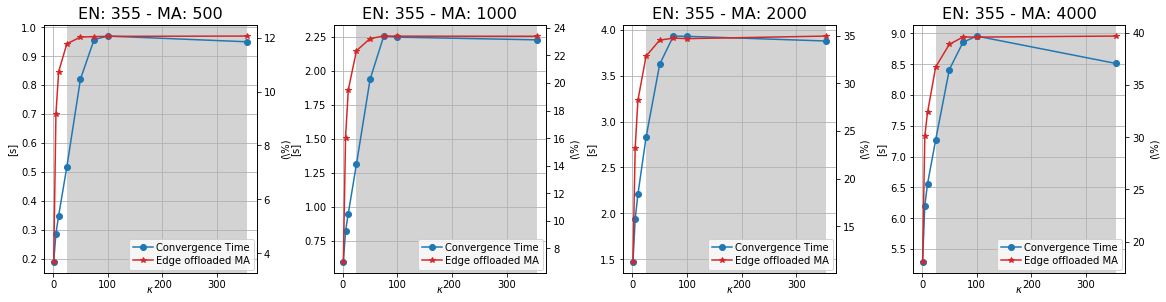

In [9]:
from entities.mobile_agent import Offloaded

fig, ax = plt.subplots(1,4,figsize=(16, 4), constrained_layout=False)
LABELS = [1, 5, 10, 25, 50, 75, 100, TOTAL_EN]

list_of_groups = zip(*(iter(result_kl_ma),) * iterations)
list_of_groups_sub = zip(*(iter(list_of_groups),) * len(LABELS))

for idx, subl in enumerate(list_of_groups_sub):
    conv_time = []
    cov = []
    
    for re in subl:
        conv_time.append(np.median(list(map(lambda b: b[3], re))))

        agents = np.concatenate(list(map(lambda z: z[1], re))) 
        cov.append(len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations / MA * 100)

    
    ax[idx].plot(LABELS, conv_time, marker="o", label="Convergence Time")
    ax[idx].set_ylabel("[s]")
    ax[idx].set_xlabel("$\kappa$",labelpad=-5)
    ax[idx].set_title("EN: {} - MA: {}".format(TOTAL_EN, TARGET_MA[idx]), fontsize=16)
    ax[idx].grid()

    ax2 = ax[idx].twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('(\%)')  # we already handled the x-label with ax1
    ax2.plot(LABELS, cov, marker="*", color=color, label="Edge offloaded MA")
    ax2.tick_params(axis='y')

    h1, l1 = ax[idx].get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax[idx].legend(h1+h2, l1+l2, loc=4,
              labelspacing=0.3, handletextpad=0.3,
                    borderaxespad=0.3, columnspacing=0.2)

    ax[idx].axvspan(25,TOTAL_EN,zorder=0, facecolor='lightgrey',
               linestyle='--')

    plt.tight_layout(pad=0)

fig.savefig("../plots/baseline/multi_kappa_tradeoff_ma.pdf",  bbox_inches="tight")